# Lecture 5 - Image Morphing

<br><br>

<b>Image morphing is the process of gradually converting one image into another</b>
    
<b>This process has been used in the past two decades in the entertainment industry, but it is also very useful in image classification algorithms</b>

<b>There are two processes used here in the morphing</b>

<b>The first is an image <b>warp</b> which smoothly transitions one image to a specified grid</b>

<b>The second is the <b>morph</b> which uses the warp to gradually transition one image into another</b>

<b>The warp process requires that the user mark several anchor points (fiducial points) in the image</b>

<b>Generally, these are located at the edges and corners of major features</b>

<b>A large number of fiducial points will create a better warp result but also increase the computational cost</b>

<br><br><br><br>


## Warp

<br>

<b>There are a few steps required to warp an image</b>

<b>First, fiducial points in the image are identified</b>

<b>The process will require the grid for the image and a second grid which is the target for warping</b>

<b>Points in the image will move from locations in the first grid to locations in the second grid</b>

<b>The grid defines a lattice structure which is created by Delaunay tessellation</b>

<b>Finally, all of the components are in place and the warping process can be applied</b>

<br><br>

### Marking Fiducial Points

<br>

<b>Fiducial points or landmarks are the anchor points within an image that guide the warp</b>

<b>The fiducial points are located at important features such as corners and edges</b>

<b>These fiducial points are the nodes in the lattice structure</b>

<b>In facial recognition algorithms, fiducial points are commonly located about the perimeter of the eyes, nose, and mouth </b> 

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture_6_7_8_9/P2im3.png?raw=true" width="300"/img></div>
<br><br>

<b>Automated facial recognization is a continuing area of reserach in deep learning</b>

<b>A simple literature research will show the current state</b>

<br><br>

### Finding Fiducial Landmarks

<br>

<b>Detecting facial landmarks is a two step process:</b><br><br>

<b>
* Step #1: Localize the face in the image<br><br>
* Step #2: Detect the key facial structures on the face ROI<br><br>
</b>

<b>Face detection (Step #1) can be achieved in a number of ways</b>

<b>One could use OpenCV’s built-in Haar Cascades</b>

<b>Or we might even use deep learning-based algorithms for face localization</b><br>

<b>The actual algorithm used to detect the face in the image doesn’t matter</b>

<b>Instead, what’s important is that through some method we obtain the face bounding box (i.e., the (x, y)-coordinates of the face in the image)</b>

<b>Given the face region we can then apply Step #2: detecting key facial structures in the face region</b>

<b>There are a variety of facial landmark detectors, but all methods essentially try to localize and label the following facial regions:</b>

* Mouth
* Right eyebrow
* Left eyebrow
* Right eye
* Left eye
* Nose
* Jaw

<b>The facial landmark detector included in the dlib library is an implementation of the One Millisecond Face Alignment with an Ensemble of Regression Trees paper by Kazemi and Sullivan (2014)</b>

<b>This method starts by using:</b>

* A training set of labeled facial landmarks on an image. These images are manually labeled, specifying specific (x, y)-coordinates of regions surrounding each facial structure.
    
* Priors or more specifically, the probability on distance between pairs of input pixels.

<b>Given the training data, an ensemble of regression trees are trained to estimate the facial landmark positions directly from the pixel intensities themselves (i.e., no “feature extraction” is taking place)</b>
    
<b>The end result is a facial landmark detector that can be used to detect facial fiducial point in real-time with high quality predictions</b>

<br><br>

### dlib’s facial landmark detector

<b>The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face</b>
    
<b>The indexes of the 68 coordinates can be visualized on the image below:</b>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture_6_7_8_9/P2im4.png?raw=true" width="400"/img></div>
<br><br>

<b>These annotations are part of the 68 point iBUG 300-W dataset which the dlib facial landmark predictor was trained on (https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/)</b>

<br><br>

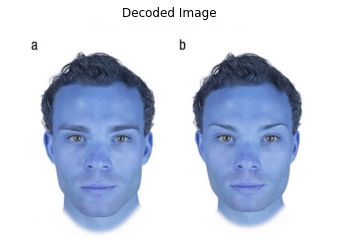

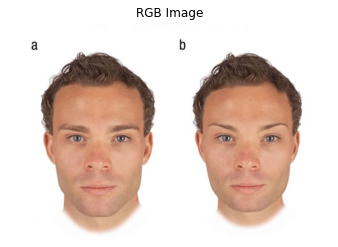

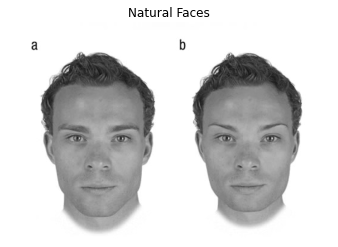

Faces Locations:
 [[ 48 112 207 207]
 [306 123 192 192]]


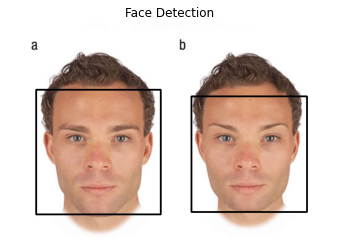

In [1]:
#  facial detection example
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
from pylab import rcParams  # used to change image size
import urllib.request as urlreq
import numpy as np

# read image with openCV
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/masc_fem.jpg'
s = urlreq.urlopen(url)
img_array = np.array(bytearray(s.read()), dtype=np.uint8)
#  cv2.imdecode() function reads data from specified memory cache and converts (decodes) data into image format
image = cv2.imdecode(img_array, -1)

# plot image with matplotlib package
plt.axis('off')
plt.title('Decoded Image')
plt.imshow(image, cmap='gray')
plt.show()

####  image process the image
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.axis('off')
plt.title('RGB Image')
plt.imshow(image_rgb)
plt.show()

# create a copy of the image to be used later
image_template = image_rgb.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis('off')
plt.title('Natural Faces')
plt.imshow(image_gray, cmap='gray')
plt.show()

# create an instance of the Face Detection Cascade Classifier
#  https://github.com/opencv/opencv/tree/master/data/haarcascades
ppath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/GGS680_Earth_Image_Processing/Fall_2021/Lectures/Lecture_4_Image_Morphing/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)

# Print coordinates of detected faces
print('Faces Locations:\n', faces)

for face in faces:
#  save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
# Draw a black colored rectangle around each face using the face's coordinates
#   on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(0, 0, 0), 2)

plt.axis('off')
plt.title('Face Detection')
plt.imshow(image_template)
plt.show()


In [2]:
#  facial point detection example
#  pip install opencv-python
#  pip install opencv_contrib_python
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
import urllib.request as urlreq
import numpy as np
import os

print(cv2.__version__)
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("lbfmodel.yaml exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# read image with openCV
url = 'https://github.com/LiamWhitenack/Image-Processing-Course/blob/main/2faces.jpg'
s = urlreq.urlopen(url)
img_array = np.array(bytearray(s.read()), dtype=np.uint8)
#  cv2.imdecode() function reads data from specified memory cache and converts (decodes) data into image format
image = cv2.imdecode(img_array, -1)
# convert image to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the haarcascade classifier on the "grayscale image"
ppath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/GGS680_Earth_Image_Processing/Fall_2021/Lectures/Lecture_4_Image_Morphing/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)

# Detect landmarks on "image_gray"
ok, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
        cv2.circle(image_rgb, (int(x), int(y)), 1, (0, 255, 0), 4)  # display landmarks on image
plt.axis("off")
plt.imshow(image_rgb)
plt.show()


4.5.5
lbfmodel.yaml exists


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<br><br><br><br>

## Delaunay Tessellation

<br>

<b>Delaunay tessellation produces a set of triangles</b>

<b>The intersections of the triangles are the fiducial points, and the  triangles have the following conditions</b>

* Edges of the triangles do not cross other edges
* A circle that connects three points of a triangle will not contain other points from other triangles
* Acute angles are avoided

<b>The scipy.spatial module offers the Delaunay object</b>

<br><br>

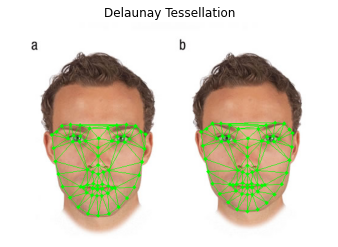

In [3]:
#  Delaunay Tessellation
import numpy as np
from scipy.spatial import Delaunay

color = (0, 255, 0)  #  green

for landmark in landmarks:
    points = landmark[0]
    indices = Delaunay(points).simplices
    vertices = points[indices]
    for vertice in vertices:
        pts = np.array(vertice, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image_rgb, [pts], 1, color)
    
plt.axis('off')
plt.title('Delaunay Tessellation')
plt.imshow(image_rgb)
plt.show()

<br><br><br><br>

### Warping

<br>

<b>The Warp operator moves pixels to new locations according the prescription defined by a fiducial grid $G$, as in,</b>

${\bf b}[\vec x] = W_G {\bf a}[\vec x]$ <br>

<b>The tessellation creates the triangles and can even identify the triangles in which a point is in</b>

<b>The fiducial points are the corners of the triangles and moving them from input space to output space is quite easy since the points are well defined in both spaces</b>

<b>The points that are interior to the triangle are not well defined in the output space</b>

<b>A method computes the distance from a point to the three corners</b>

<b>The ratios of these distances are used to compute the new points</b>

<b>The corners of a triangle are defined as: $\vec p_1$, $\vec p_2$, and $\vec p_3$.  Any point, $\vec p_4$, within a triangle is defined as a linear combination of the the corners as in,</b>

$\vec p_4 = \lambda_1 \vec p_1 + \lambda_2 \vec p_2 + \lambda_3 \vec p_3$

<b>where</b>

$\lambda_1 + \lambda_ 2 + \lambda_3 = 1$

<b>Determining the location of the point in the new space $T$ is performed through a linear transformation, </b>

$ \begin{bmatrix} \lambda_1 \\ \lambda_2 \end{bmatrix} = {\bf T}^{-1} (\vec p_4 - \vec p_3)$

<b>where</b>

$T = \begin{bmatrix}
  x_1 - x_3 & x_2 - x_3 \\
  y_1 - y_3 & y_2 - y_3 \end{bmatrix}$

<b>where $\lambda_3$ is defined as $\lambda_3 = 1 - \lambda_1 - \lambda_2$

<b>This process is repeated for all points using the appropriate triangles</b>

<b>Transformation of points that are outside of the face boundary is accomplished by adding four fiducial points for the corners of the image frame</b>

<b>Thus each point in the input image is within a triangle</b>

<br><br><br><br>


## Average Face

<br>

<b>The average face is a composite image created from the facial images of many people</b>

<b>The phrase "average" implies that the entities are summed and then the result is divided by the number of entities</b>

<b>Given a set of vectors $\lbrace \vec x_i; i=1,...,N \rbrace$ the average is usually computed by, $\frac{1}{N} \sum_{i=1} ^N \vec x_i$</b>

<b>In order to create a realistic average face it is necessary to align significant features such as the eyes, mouths, noses, etc</b>

<b>This is accomplished by aligning all of the faces to a single fiducial grid, $G$, before computing the average</b>

<b>Formally, the average face is</b>

$ {\bf b}[\vec x] = \frac{1}{N} \sum_i W_G {\bf a}_i [\vec x]  = \frac{1}{N} \sum \{ W_G {\bf a}[\vec x] \}$

<b>where ${\bf a}_i[\vec x]$ is the i-th face image and $ W_G$ is the warping operator that maps the image to an average fiducial grid $G$</b>

<br><br>

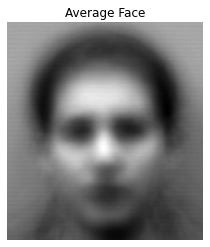

In [4]:
#  average face example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from cv2 import imread

#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
dir = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/faces94/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

<br><br><br><br>

## Image Morphing

<br>

<b>Image morphing is the gradual transformation from one image into another</b> 

<b>Two input images can be designated at ${\bf a}[\vec x]$ and ${\bf b}[\vec x]$, and their respective fiducial grids are $G_a$ and $G_b$. For a given value of $\alpha$ between 0 and 1, the target grid is,</b>

$G_c = (1- \alpha) G_a + \alpha G_b$

<b>Both images are warped to the $G_c$ grid and the intensity contributions are determined by $\alpha$.  So, the new image is obtained by,</b>

${\bf c}[\vec x]= (1-\alpha) W_{G_c} {\bf a}[\vec x] + \alpha W_{G_c} {\bf b}[\vec x]$

<b>The morphing process generates a series of images for different values of $\alpha$</b>

<br><br>

In [1]:
#  example from https://github.com/vdumoulin/morphing_faces
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import numpy
import matplotlib.pyplot

numpy.random.seed(112387)  #  so we can reproduce our results

"""
Variational Autoencoder (VAE): in neural net language, a VAE consists of an encoder, a decoder, and a loss function. 
In probability model terms, the variational autoencoder refers to approximate inference in a latent Gaussian model 
where the approximate posterior and model likelihood are parametrized by neural nets (the inference and generative networks).

Loss function: in neural net language, we think of loss functions. Training means minimizing these loss functions. 
But in variational inference, we maximize the ELBO (which is not a loss function). This leads to awkwardness like 
calling optimizer.minimize(-elbo) as optimizers in neural net frameworks only support minimization.

Encoder: in the neural net world, the encoder is a neural network that outputs a representation zzz of data xxx. 
In probability model terms, the inference network parametrizes the approximate posterior of the latent variables zzz. 
The inference network outputs parameters to the distribution q(z∣x)q(z \ x)q(z∣x).

Decoder: in deep learning, the decoder is a neural net that learns to reconstruct the data xxx given a representation zzz. 
In terms of probability models, the likelihood of the data xxx given latent variables zzz is parametrized by a generative 
network. The generative network outputs parameters to the likelihood distribution p(x∣z)p(x \ z)p(x∣z).


"""
class Morpher(object):
    """
    Generates images of faces using a variational autoencoder (VAE) to map
    a point Z in a 400-dimensional latent space to X, a 48 x 48 pixels image.

    The model was trained on the Toronto Face Database (TFD) and features two
    hidden layers with 2000 rectified linear units each. The prior distribution
    p(X) was chosen to be gaussian, and the conditional distribution p(X | Z)
    was also chosen to be gaussian.

    While the latent space is 400-dimensional, most of the dimensions in Z are
    ignored by the decoder as a result of the training procedure. Those that
    carry information (29 of them) can be used to vary the coordinates of Z.
    """
    # Mapping between the 29 useful dimensions in latent space and their index
    index_mapping = {0: 31, 1: 37, 2: 42, 3: 47, 4: 69, 5: 83, 6: 84, 7: 94,
                     8: 101, 9: 137, 10: 138, 11: 139, 12: 165, 13: 178,
                     14: 192, 15: 197, 16: 206, 17: 212, 18: 219, 19: 235,
                     20: 259, 21: 275, 22: 280, 23: 288, 24: 319, 25: 340,
                     26: 354, 27: 369, 28: 380}
    # Shape of the generated images
    image_shape = (48, 48)

    def __init__(self):
        # If true, ignore requests to change the coordinates of Z
        self.freeze_coordinates = False
        # Dimensions along which coordinates of Z will vary
        self.dimension_0 = self.index_mapping[28]
        self.dimension_1 = self.index_mapping[11]
        # Point in latent space, selected at random to begin with
        self.Z = self._sample_Z()

        # Model parameters
        self.d_W_2 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_W_2.npy')
        self.d_b_2 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_b_2.npy')
        self.d_W_1 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_W_1.npy')
        self.d_b_1 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_b_1.npy')
        self.d_W_0 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_W_0.npy')
        self.d_b_0 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_b_0.npy')

        self.e_W_2 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_W_2.npy')
        self.e_b_2 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_b_2.npy')
        self.e_W_1 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_W_1.npy')
        self.e_b_1 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_b_1.npy')
        self.e_W_0 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_W_0.npy')
        self.e_b_0 = numpy.load('C:/Users/pmsqu/Desktop/morphing_faces-master/data/e_b_0.npy')

    def toggle_freeze(self):
        """
        Toggles on and off the option to ignore requests to change coordinates
        of Z
        """
        self.freeze_coordinates = not self.freeze_coordinates

    def _sample_Z(self):
        """
        Samples a point in latent space according to the prior distribution
        p(Z)
        """
        return numpy.random.normal(size=(400, ))

    def shuffle(self):
        """
        Resamples a new Z
        """
        self.Z = self._sample_Z()

    def select_dimensions(self, d_0, d_1):
        """
        Selects the two dimensions in Z along which coordinates will vary
        """
        if d_0 not in self.index_mapping or d_1 not in self.index_mapping:
            raise KeyError()
        self.dimension_0 = self.index_mapping[d_0]
        self.dimension_1 = self.index_mapping[d_1]

    def get_Z(self):
        """
        Returns the current point in latent space
        """
        return self.Z.copy()

    def set_Z(self, Z):
        """
        Sets the current point in latent space
        """
        self.Z = Z.copy()

    def set_coordinates(self, x, y):
        """
        Sets new coordinates for the two selected dimensions of Z if
        coordinates are not frozen
        """
        if not self.freeze_coordinates:
            self.Z[self.dimension_0] = x
            self.Z[self.dimension_1] = y

    def generate_face(self):
        """
        Maps the point Z in latent space to a 48 x 48 pixels face image
        """
        A_2 = numpy.dot(self.Z, self.d_W_2) + self.d_b_2
        H_2 = numpy.where(A_2 > 0.0, A_2, 0.0 * A_2)

        A_1 = numpy.dot(H_2, self.d_W_1) + self.d_b_1
        H_1 = numpy.where(A_1 > 0.0, A_1, 0.0 * A_1)

        A_0 = numpy.dot(H_1, self.d_W_0) + self.d_b_0
        X = 1.0 / (1.0 + numpy.exp(-A_0))

        return X.reshape(self.image_shape)

    def infer_Z(self, X):
        """
        Maps an 48 x 48 face image to its representation Z in latent space

        Parameters
        ----------
        X : numpy.array
            Array of shape (2304, ) or (48, 48) representing the face image
        """
        A_1 = numpy.dot(X, self.e_W_0) + self.e_b_0
        H_1 = numpy.where(A_1 > 0.0, A_1, 0.0 * A_1)

        A_2 = numpy.dot(H_1, self.e_W_1) + self.d_b_1
        H_2 = numpy.where(A_2 > 0.0, A_2, 0.0 * A_2)

        Z = numpy.dot(H_2, self.e_W_2) + self.e_b_2

        return Z

if __name__ == "__main__":
    # Initialize face generator
    morpher = Morpher()

    # Make sure I/O doesn't hang when displaying the image
#    pyplot.ion()

    # Build visualization window
    fig = plt.figure(figsize=(1, 1), dpi=300)
    im = plt.imshow(X=morpher.generate_face(),
                       interpolation='nearest',
                       cmap='gray')
    plt.axis('off')
    plt.show()

    # Program loop
    quit = False
    help_message = (
        "\n" +
        "COMMANDS:\n" +
        "    h          Display this help message\n" +
        "    r          Randomize face\n" +
        "    q          Quit the program\n"
    )
    print(help_message)
    while not quit:
        command_args = input('Type a command: ').strip().split(" ")
        if command_args[0] == 'h':
            print(help_message)
        elif command_args[0] == 'q':
            quit = True
        elif command_args[0] == 'r':
            morpher.shuffle()
            a = morpher.generate_face()
            plt.axis('off')
            plt.imshow(a, cmap='gray')
            plt.show()
        else: continue

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/pmsqu/Desktop/morphing_faces-master/data/d_W_2.npy'

<br><br><br><br><br><br><br><br><br><br><br><br>

# Homework

<br>
<b>
    
1. With the provided image (2faces.jpg), find the face loaction and  display the face with a rectangle drawn on the face.<br><br>

2. Identify and using the face location, crop the first face and display and save it to a file.<br><br>

3. With the image used in #1, plot the landmark points in black on the face.<br><br>

4. Calculate and display the Delaunay Tessellation in black on the face.<br><br>

5. Repeat the average face example only using female faces.<br><br>

6. Repeat the average face example only using male faces.<br><br>

7. What differences do you see between the averaged female and male faces?<br><br>
</b>